In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Этот набор данных содержит информацию о погоде в городе Дели(Индия)
# с 1 января 2013 года по 24 апреля 2017 года.
Данные имеют несколько параметров:
1) Дата (date);
2) Влажность (humidity);
3) Средняя температура (meantemp);
4) Скорость ветра (wind_speed);
5) Среднее давление (meanpressure).

In [3]:
df_train = pd.read_csv('data/DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
df_test = pd.read_csv('data/DailyDelhiClimateTest.csv', index_col='date', parse_dates=True)
df = pd.concat([df_train, df_test])

Посмотрим данные:

In [4]:
print(f'Кол-во строк в тренировочных данных: {len(df_train)}')
print(f'Кол-во строк в тестовых данных: {len(df_test)}')
print(f'Кол-во строк во всем датасете: {len(df)}')

Кол-во строк в тренировочных данных: 1462
Кол-во строк в тестовых данных: 114
Кол-во строк во всем датасете: 1576


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1576 entries, 2013-01-01 to 2017-04-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1576 non-null   float64
 1   humidity      1576 non-null   float64
 2   wind_speed    1576 non-null   float64
 3   meanpressure  1576 non-null   float64
dtypes: float64(4)
memory usage: 61.6 KB


Все столбцы имеют тип float

In [6]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Пропусков в тренировочных данных нет.

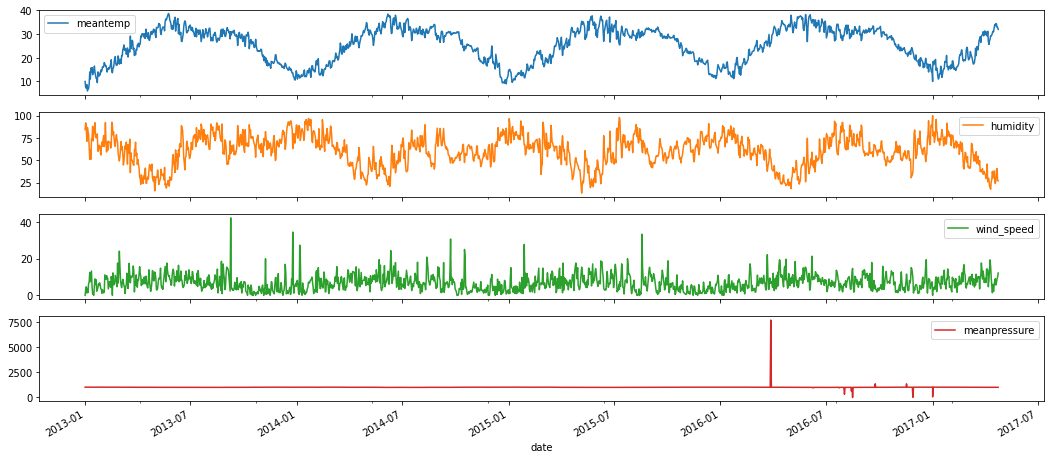

In [160]:
df.plot(subplots=True, figsize=(18,8))
plt.show()

In [136]:
df_month = df['meantemp'].resample('MS').mean()

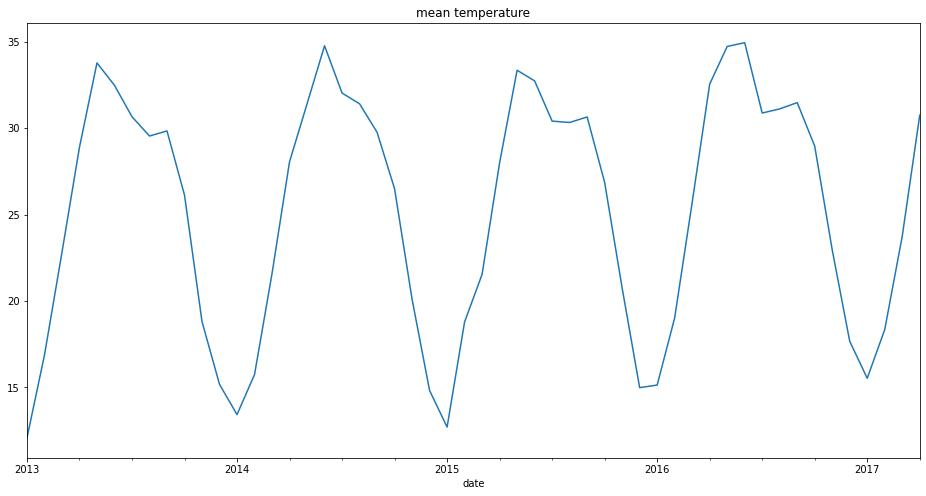

In [137]:
plt.title('mean temperature')
df_month.plot(figsize=(16,8))
plt.show()

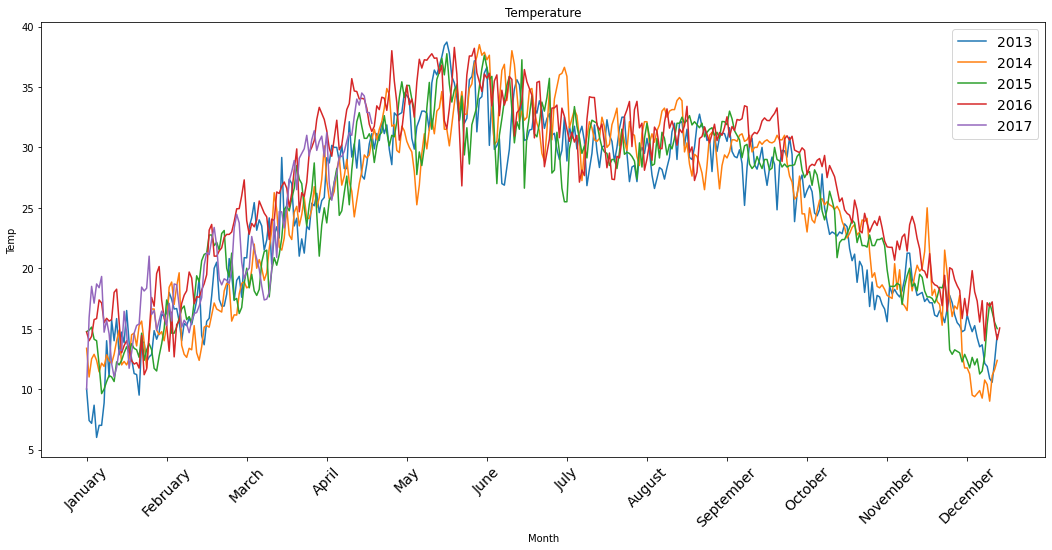

In [163]:
dates = pd.to_datetime(df.index)
plt.figure(figsize=(18,8))
plt.title('Temperature')
for y in dates.year.unique():
    plt.plot(df['meantemp'][dates.year==y].values, label=y)
plt.xlabel('Month')
plt.ylabel('Temp')
plt.xticks(np.arange(0, 365, 32), labels=dates.month_name().unique(), rotation=45, fontsize=14)
plt.legend(fontsize=14)
plt.show()

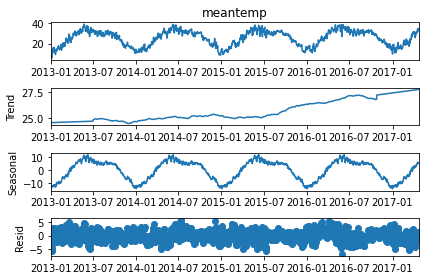

In [169]:
decomp_a = seasonal_decompose(df['meantemp'], model='additive', extrapolate_trend='freq', period=365)
decomp_a.plot()
plt.show()

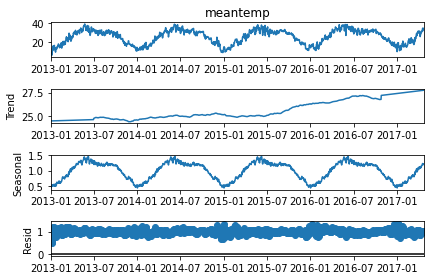

In [168]:
dec_m = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
dec_m.plot()
plt.show()